In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [427]:
def greens_function(x, y, t, x0, y0, t0, form='2d_wave'):
    
    # 2D diffusion
    if form == '2d_diffusion':
        k = 1
        c_x = 5
        c_y = 1
        rho = np.sqrt(c_x * (x - x0) ** 2 + c_y * (y - y0) ** 2)
        t = t - t0
        if t <= 0:
            return 0
        else:
            return 1 / (4 * np.pi * k * t) * np.exp(- rho ** 2 / (4 * k * t))
    
    # 2D wave function
    if form == '2d_wave':
        v = 1
        c_x = 5
        c_y = 1
        rho = np.sqrt(c_x * (x - x0) ** 2 + c_y * (y - y0) ** 2)
        t = t - t0
        if t <= rho / v:
            return 0
        else:
            return 1 / (2 * np.pi * v * np.sqrt(v**2 * t**2 - rho**2))
    
    # 2D Ca Fast
    if form == '2d_ca_fast':
        tau = 1
        rho_e = 60
        v = 500
        t = t - t0
        c_x = 5
        c_y = 1
        rho = np.sqrt(c_x * (x - x0) ** 2 + c_y * (y - y0) ** 2)
        if t <= rho / v:
            return 0
        else:
            return np.exp(-(t - rho / v) / tau) * np.exp(-rho / rho_e)
        
    # 2D Ca Slow
    if form == '2d_ca_slow':
        tau = 5
        rho_e = 8
        v = 1
        t = t - t0
        c_x = 5
        c_y = 1
        rho = np.sqrt(c_x * (x - x0) ** 2 + c_y * (y - y0) ** 2)
        if t <= rho / v:
            return 0
        else:
            return np.exp(-(t - rho / v) / tau) * np.exp(-rho / rho_e)

In [250]:
numx = 30
numy = 60
x0 = numx // 2
y0 = numy // 2
t0 = 0

dt = 0.1
dx = 1
dy = 1

trange = np.arange(0, 50, dt)
xrange = np.arange(0, numx, dx)
yrange = np.arange(0, numy, dy)

data_mat = np.zeros((len(trange), len(xrange), len(yrange)))

## 2D Diffusion (IP$_3$）

$\partial_t - k^2\nabla_{\text{2D}}^2$

In [251]:
for k, t in tqdm(enumerate(trange)):
    for i, x in enumerate(xrange):
        for j, y in enumerate(yrange):
            data_mat[k, i, j] = greens_function(x, y, t, x0, y0, t0, '2d_diffusion')

500it [00:08, 62.34it/s]


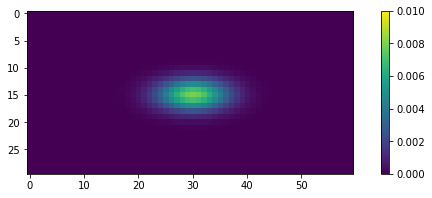

In [252]:
plt.figure(figsize=(10,3))
plt.imshow(data_mat[100], vmin=0, vmax=0.01)
plt.colorbar()
plt.show()

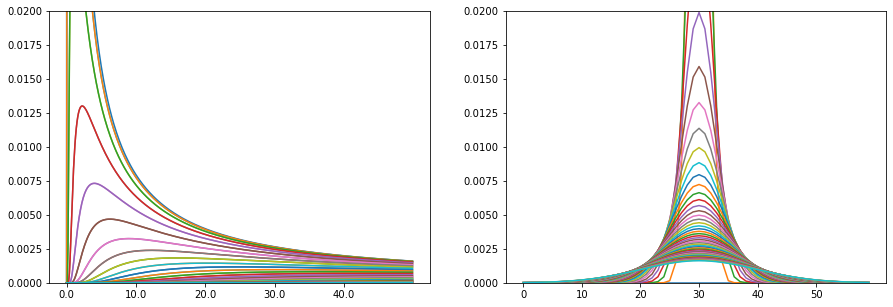

In [253]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(data_mat[:, data_mat.shape[1] // 2, ::])
ax1.set_ylim(0, 0.02)
ax1.set_xticks(range(0, len(trange), 100))
ax1.set_xticklabels(trange[::100])

ax2 = fig.add_subplot(122)
ax2.plot(data_mat[::int(1/dt), data_mat.shape[1] // 2, ::1].T)
ax2.set_ylim(0, 0.02)
ax2.set_xticks(range(0, len(yrange), 10))
ax2.set_xticklabels([int(y) for y in yrange[::10]])
plt.show()

## 2D Wave

$\partial^2_{t} - v^2\nabla_{\text{2D}}^2$

In [240]:
for k, t in tqdm(enumerate(trange)):
    for i, x in enumerate(xrange):
        for j, y in enumerate(yrange):
            data_mat[k, i, j] = greens_function(x, y, t, x0, y0, t0, '2d_wave')

500it [00:07, 69.93it/s]


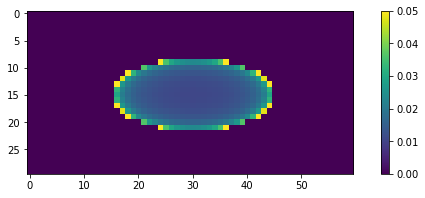

In [241]:
plt.figure(figsize=(10,3))
plt.imshow(data_mat[150], vmin=0, vmax=0.05)
plt.colorbar()
plt.show()

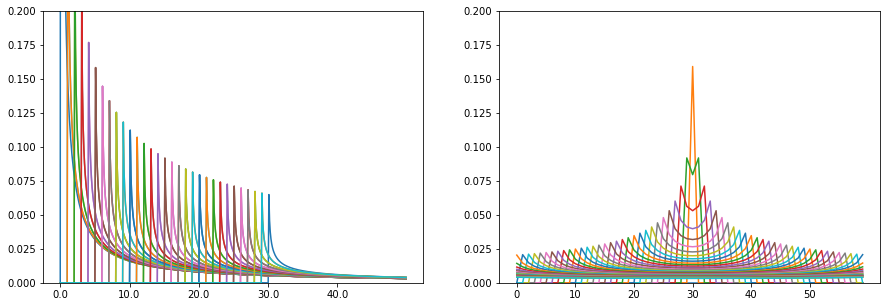

In [243]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(data_mat[:, data_mat.shape[1] // 2, ::])
ax1.set_ylim(0, 0.2)
ax1.set_xticks(range(0, len(trange), 100))
ax1.set_xticklabels(trange[::100])

ax2 = fig.add_subplot(122)
ax2.plot(data_mat[::int(1/dt), data_mat.shape[1] // 2, ::1].T)
ax2.set_ylim(0, 0.2)
ax2.set_xticks(range(0, len(yrange), 10))
ax2.set_xticklabels([int(y) for y in yrange[::10]])
plt.show()

## 2D Ca Fast

$$G(x, t) = \Theta (t - \frac{\rho}{v}) e^{-\frac{t}{\tau}} e^{-\frac{\rho}{\rho_c}}$$

In [356]:
dt = 0.001
dx = 1
dy = 1

trange = np.arange(0, 0.2, dt)
xrange = np.arange(0, numx, dx)
yrange = np.arange(0, numy, dy)

data_mat = np.zeros((len(trange), len(xrange), len(yrange)))
for k, t in tqdm(enumerate(trange)):
    for i, x in enumerate(xrange):
        for j, y in enumerate(yrange):
            data_mat[k, i, j] = greens_function(x, y, t, x0, y0, t0, '2d_ca_fast')

200it [00:03, 59.64it/s]


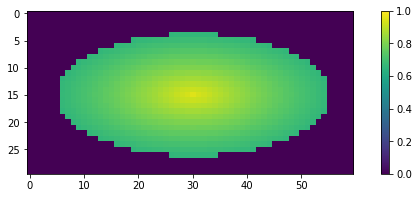

In [360]:
plt.figure(figsize=(10,3))
plt.imshow(data_mat[50], vmin=0, vmax=1)
plt.colorbar()
plt.show()

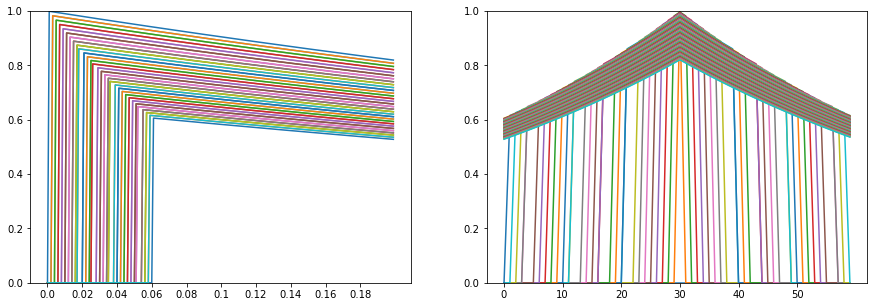

In [358]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(data_mat[:, data_mat.shape[1] // 2, ::])
ax1.set_ylim(0, 1)
ax1.set_xticks(range(0, len(trange), 20))
ax1.set_xticklabels(trange[::20])

ax2 = fig.add_subplot(122)
ax2.plot(data_mat[::2, data_mat.shape[1] // 2, ::1].T)
ax2.set_ylim(0, 1)
ax2.set_xticks(range(0, len(yrange), 10))
ax2.set_xticklabels([int(y) for y in yrange[::10]])
plt.show()

## 2D Ca Slow

$$G(x, t) = \Theta (t - \frac{\rho}{v}) e^{-\frac{t}{\tau}} e^{-\frac{\rho}{\rho_c}}$$

In [428]:
dt = 0.1
dx = 1
dy = 1

trange = np.arange(0, 50, dt)
xrange = np.arange(0, numx, dx)
yrange = np.arange(0, numy, dy)

data_mat = np.zeros((len(trange), len(xrange), len(yrange)))

In [429]:
data_mat = np.zeros((len(trange), len(xrange), len(yrange)))
for k, t in tqdm(enumerate(trange)):
    for i, x in enumerate(xrange):
        for j, y in enumerate(yrange):
            data_mat[k, i, j] = greens_function(x, y, t, x0, y0, t0, '2d_ca_slow')

500it [00:07, 70.79it/s]


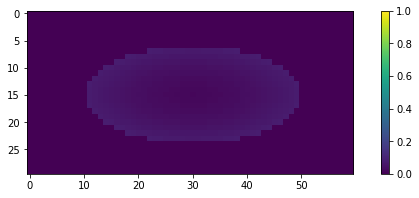

In [435]:
plt.figure(figsize=(10,3))
plt.imshow(data_mat[200], vmin=0, vmax=1)
plt.colorbar()
plt.show()

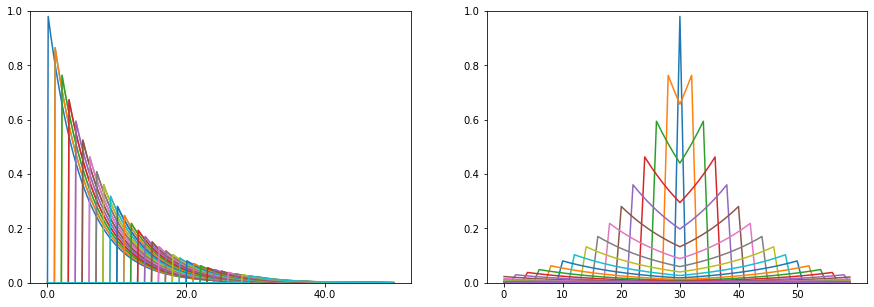

In [432]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(data_mat[:, data_mat.shape[1] // 2, ::])
ax1.set_ylim(0, 1)
ax1.set_xticks(range(0, len(trange), 200))
ax1.set_xticklabels(trange[::200])

ax2 = fig.add_subplot(122)
ax2.plot(data_mat[1::20, data_mat.shape[1] // 2, ::1].T)
ax2.set_ylim(0, 1)
ax2.set_xticks(range(0, len(yrange), 10))
ax2.set_xticklabels([int(y) for y in yrange[::10]])
plt.show()